PROBLEM 1 CONFIGURATION OF COMPETITION CONTENT

What to learn and what to predict
1. To predict how capable each applicant is of paying loan

What Kind of file to create and submit
1. A file predicting the probability for the TARGET variable and should contain a header both SK_ID and TARGET

What kind of index value will be used to evaluate submission?
1. Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

PROBLEM 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the Dataset
df_train = pd.read_csv(r'C:\Users\DoBUY\Downloads\IRIS DATASET\application_train.csv')
df_test = pd.read_csv(r'C:\Users\DoBUY\Downloads\IRIS DATASET\application_test.csv')

df_train.shape, df_test.shape

((307511, 122), (48744, 121))

In [3]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Basic analysis
df_train.shape, df_train.size

((307511, 122), 37516342)

In [5]:
df_test.shape, df_test.size

((48744, 121), 5898024)

In [6]:
#Display the stats about the train data
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
df_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


PREPROCESSING

In [10]:
#Examine the distribution of the target Column
df_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

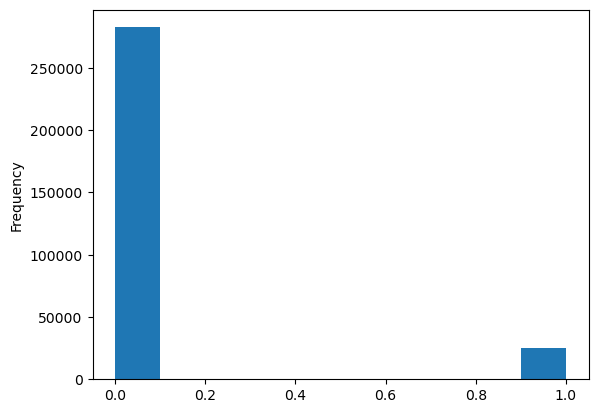

In [11]:
df_train['TARGET'].plot.hist();

In [12]:
df_train[['DAYS_BIRTH']] = df_train[['DAYS_BIRTH']]/-365
df_train[['DAYS_REGISTRATION']] = df_train[['DAYS_BIRTH']]/-365
df_train[['DAYS_ID_PUBLISH']] = df_train[['DAYS_ID_PUBLISH']]/-365
df_train[['DAYS_LAST_PHONE_CHANGE']] = df_train[['DAYS_LAST_PHONE_CHANGE']]/-365

In [13]:
df_train['DAYS_EMPLOYED_ANOM'] = df_train['DAYS_EMPLOYED'] == 365243
df_train['DAYS_EMPLOYED'] = df_train.replace({365243: np.nan}, inplace=True)


df_test['DAYS_EMPLOYED_ANOM'] = df_test['DAYS_EMPLOYED'] == 365243
df_test['DAYS_EMPLOYED'] = df_test.replace({365243: np.nan}, inplace=True)


In [14]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002.0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003.0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004.0,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006.0,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007.0,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [15]:
#Total Missing Values on  Train Dataset
train_missing_val = df_train.isnull().sum().sort_values(ascending=False)

#Percentage of Missing Values
percent_missing_val = 100 * train_missing_val/len(df_train)

#Making a Table with the result
missing_val_table = pd.concat([train_missing_val, percent_missing_val], axis=1)

#Rename the column
missing_val_table = missing_val_table.rename(
    columns= {0 : 'Missing_val' , 1: 'Percentage'}).round(1)
null_table = missing_val_table[missing_val_table.iloc[:, 1]>0]
null_table

,Missing_val,Percentage
DAYS_EMPLOYED,307511,100.0
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
...,...,...
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3
EXT_SOURCE_2,660,0.2


In [16]:
#Total Missing Values on  Test Dataset
test_missing_val = df_test.isnull().sum().sort_values(ascending=False)

#Percentage of Missing Values
percent_missing_val = 100 * test_missing_val/len(df_test)

#Making a Table with the result
missing_val_table = pd.concat([test_missing_val, percent_missing_val], axis=1)

#Rename the column
missing_val_table = missing_val_table.rename(
    columns= {0 : 'Missing_val' , 1: 'Percentage'}).round(1)
null_table1 = missing_val_table[missing_val_table.iloc[:, 1]>0]
null_table1

,Missing_val,Percentage
DAYS_EMPLOYED,48744,100.0
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
...,...,...
NAME_TYPE_SUITE,911,1.9
OBS_30_CNT_SOCIAL_CIRCLE,29,0.1
DEF_30_CNT_SOCIAL_CIRCLE,29,0.1
OBS_60_CNT_SOCIAL_CIRCLE,29,0.1


In [17]:
df_train.dtypes.value_counts()

float64    68
int64      37
object     17
bool        1
Name: count, dtype: int64

In [18]:
df_test.dtypes.value_counts()

float64    65
int64      39
object     17
bool        1
Name: count, dtype: int64

In [19]:
df_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
DAYS_EMPLOYED                  0
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [20]:
df_train.select_dtypes('object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,None,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,None,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,None,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,None,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,None,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,None,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,None,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,None,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,None,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


In [21]:
#drop missing values greater than 10

drop_null = null_table[null_table['Percentage']>0.1].index
app_train = df_train.drop(drop_null, axis=1)
miss_val = app_train.isnull().sum().sort_values(ascending=False)  
miss_val[miss_val>0]

AMT_GOODS_PRICE           278
AMT_ANNUITY                12
CNT_FAM_MEMBERS             2
SK_ID_CURR                  1
DAYS_LAST_PHONE_CHANGE      1
dtype: int64

In [22]:
df_train_objects = app_train.select_dtypes('object')
df_train_objects

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,State servant,Higher education,Married,House / apartment,MONDAY,School
2,Revolving loans,M,Y,Y,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
3,Cash loans,F,N,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Working,Secondary / secondary special,Separated,With parents,THURSDAY,Services
307507,Cash loans,F,N,Y,Pensioner,Secondary / secondary special,Widow,House / apartment,MONDAY,XNA
307508,Cash loans,F,N,Y,Working,Higher education,Separated,House / apartment,THURSDAY,School
307509,Cash loans,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Business Entity Type 1


In [23]:
#drop missing values greater than 10

drop_null = null_table[null_table['Percentage']>0.1].index
app_test = df_test.drop(drop_null, axis=1)
miss_val_0 = app_test.isnull().sum().sort_values(ascending=False)  
miss_val_0[miss_val_0>0]

AMT_ANNUITY    24
dtype: int64

In [24]:
df_test_objects = app_test.select_dtypes('object')
df_test_objects

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,F,N,Y,Working,Higher education,Married,House / apartment,TUESDAY,Kindergarten
1,Cash loans,M,N,Y,Working,Secondary / secondary special,Married,House / apartment,FRIDAY,Self-employed
2,Cash loans,M,Y,Y,Working,Higher education,Married,House / apartment,MONDAY,Transport: type 3
3,Cash loans,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,Y,N,Working,Secondary / secondary special,Married,House / apartment,FRIDAY,Business Entity Type 3
...,...,...,...,...,...,...,...,...,...,...
48739,Cash loans,F,N,Y,Working,Secondary / secondary special,Widow,House / apartment,WEDNESDAY,Other
48740,Cash loans,F,N,N,Commercial associate,Secondary / secondary special,Married,House / apartment,MONDAY,Trade: type 7
48741,Cash loans,F,Y,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Business Entity Type 3
48742,Cash loans,M,N,N,Commercial associate,Higher education,Married,House / apartment,MONDAY,Self-employed


In [25]:
miss_val_0 = df_test_objects.isnull().sum()
miss_val_0 = miss_val_0[miss_val_0>0]
miss_val_0

Series([], dtype: int64)

In [26]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [27]:
train_object = app_train.dtypes[app_train.dtypes == 'object'].index
train_object

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [28]:
for i in train_object:
    app_train[i] = le.fit_transform(app_train[i])
    app_test[i] = le.fit_transform(app_test[i])

In [29]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307510 non-null  float64
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  int32  
 3   CODE_GENDER                  307511 non-null  int32  
 4   FLAG_OWN_CAR                 307511 non-null  int32  
 5   FLAG_OWN_REALTY              307511 non-null  int32  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  int32  
 12  NAME_EDUCATION_TYPE          307511 non-null  int32  
 13 

In [30]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  int32  
 2   CODE_GENDER                  48744 non-null  int32  
 3   FLAG_OWN_CAR                 48744 non-null  int32  
 4   FLAG_OWN_REALTY              48744 non-null  int32  
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_ANNUITY                  48720 non-null  float64
 9   AMT_GOODS_PRICE              48744 non-null  float64
 10  NAME_INCOME_TYPE             48744 non-null  int32  
 11  NAME_EDUCATION_TYPE          48744 non-null  int32  
 12  NAME_FAMILY_STATUS           48744 non-null  int32  
 13  NAME_HOUSING_TYP

In [31]:
#checking missing values again
app_train.isna().sum()[app_train.isna().sum()>0]

SK_ID_CURR                  1
AMT_ANNUITY                12
AMT_GOODS_PRICE           278
CNT_FAM_MEMBERS             2
DAYS_LAST_PHONE_CHANGE      1
dtype: int64

In [32]:
app_train['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [33]:
app_test.isna().sum()[app_test.isna().sum()>0]

AMT_ANNUITY    24
dtype: int64

In [34]:
app_test[['AMT_ANNUITY']]

,AMT_ANNUITY
0,20560.5
1,17370.0
2,69777.0
3,49018.5
4,32067.0
...,...
48739,17473.5
48740,31909.5
48741,33205.5
48742,25128.0


In [35]:
train_column = app_train.columns
train_column

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FL

In [36]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,DAYS_EMPLOYED_ANOM
0,100002.0,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,False
1,100003.0,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,False
2,100004.0,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,False
3,100006.0,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,False
4,100007.0,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,False


In [37]:
app_train['AMT_ANNUITY'].fillna((app_train['AMT_ANNUITY']).mean(), inplace=True)




In [38]:
app_train['AMT_GOODS_PRICE'].fillna((app_train['AMT_GOODS_PRICE']).mean(), inplace=True)



In [39]:
app_train['CNT_FAM_MEMBERS'].fillna((app_train['CNT_FAM_MEMBERS']).median(), inplace=True)



In [40]:
app_train['DAYS_LAST_PHONE_CHANGE'].fillna((app_train['DAYS_LAST_PHONE_CHANGE']).median(), inplace=True)



In [41]:
app_train.columns[app_train.isna().sum()>0]

Index(['SK_ID_CURR'], dtype='object')

In [42]:
# Store the 'SK_ID_CURR' column in a separate variable
sk_id_curr = app_train['SK_ID_CURR']
tarr= app_train['TARGET']

# Drop the 'SK_ID_CURR' column from the DataFrame
app_train.drop(columns=['SK_ID_CURR', 'TARGET'], inplace=True)


In [43]:
app_train.columns[app_train.isna().sum()>0]

Index([], dtype='object')

In [44]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,DAYS_EMPLOYED_ANOM
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0,0,0,0,0,False
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0,0,0,0,0,False
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0,0,0,0,0,False
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0,0,0,0,0,False
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0,0,0,0,0,False


In [45]:
app_train.shape, app_test.shape

((307511, 57), (48744, 58))

In [46]:
#split and standardize dataset
y=df_train['TARGET']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(app_train, y, test_size = 0.25, random_state = 49)

In [47]:
#LEARNING AND ESTIMATION
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [48]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print('prediciton', y_pred_dt)
#Evaluation
roc_auc_score(y_test, y_pred_dt)

prediciton [0 0 0 ... 0 0 0]


0.5180013928630567

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)

print('prediction', y_pred_rf)
#Evaluation
roc_auc_score(y_test, y_pred_rf)

In [ ]:
#ESTIMATION AND TESTING
app_test['AMT_ANNUITY'].fillna((app_test['AMT_ANNUITY']).mean(), inplace=True)

In [ ]:
print('Train', app_train.shape)
print('Test', app_test.shape)

In [ ]:
# Store the 'SK_ID_CURR' column in a separate variable
sk_id_curr = app_test['SK_ID_CURR']

# Drop the 'SK_ID_CURR' column from the DataFrame
app_test.drop(columns=['SK_ID_CURR'], inplace=True)


In [ ]:
print(app_test.columns)


In [ ]:
print(app_train.columns)

In [ ]:
test = scaler.fit_transform(app_test)

In [ ]:
y_pred_dt1 =dt.predict(test)

In [ ]:
y_pred_dt1.shape

In [ ]:
app_test['TARGET']=y_pred_dt1
y_pred_dt1

In [ ]:
# Convert y_pred_dt1 to a DataFrame
predictions_df = pd.DataFrame(y_pred_dt1, columns=['TARGET'])

# Add 'SK_ID_CURR' column back to the DataFrame
submit_df = pd.concat([sk_id_curr, predictions_df], axis=1)

# Save the DataFrame to a CSV file for submission
submit_df.to_csv('submission.csv', index=False)

submit_df.head()

PROBLEM 4 FEATURE ENGINEERING

In [ ]:
X = pd.DataFrame(app_train)
print(dt.feature_importances_)
feat_importances = pd.DataFrame(data=dt.feature_importances_, index=X.columns, columns=['importance'])
feat_importances.head()

In [ ]:
selected_feat= feat_importances.head(20).index
selected_feat

In [ ]:
x1=app_train[selected_feat[0:2]]
x2=app_train[selected_feat[0:4]]
x3=app_train[selected_feat[0:8]]
x4=app_train[selected_feat[0:10]]
x5=app_train[selected_feat[0:16]]
x6=app_train[selected_feat[0:20]]
x7=app_train[selected_feat]

In [ ]:
def feature(X, feature):
    X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=1)
    scaler= StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    y_pred=dtree.predict(X_test)
    
    roc_auc_score(y_test, y_pred)
    print(f'Roc score for(feature) is:{roc_auc_score(y_test, y_pred)}')

In [ ]:
feature(x1, 'x1')

In [ ]:
feature(x2, 'x2')

In [ ]:
feature(x3, 'x3')

In [ ]:
feature(x4, 'x4')

In [ ]:
feature(x5, 'x5')

In [ ]:
feature(x6, 'x6')

In [ ]:
feature(x7, 'x7')

In [ ]:
x7, app_test= x6.align(app_test, join='inner',axis=1)

In [ ]:
app_test.columns

In [ ]:
test1=scaler.fit_transform(app_test)

In [ ]:
X7_train, X7_test, y_train, y_test = train_test_split(x7,y, test_size=0.25)

In [ ]:
print(app_test.columns)

In [ ]:
# Convert y_pred_dt1 to a DataFrame
predictions_df1 = pd.DataFrame(y, columns=['TARGET'])

# Add 'SK_ID_CURR' column back to the DataFrame
submit_df1 = pd.concat([sk_id_curr, predictions_df1], axis=1)

# Save the DataFrame to a CSV file for submission
submit_df1.to_csv('submission.csv', index=False)

submit_df1.head()

In [ ]:
scaler=StandardScaler()
scaler.fit(X7_train)
X7_train=scaler.transform(X7_train)

In [ ]:
dtr=DecisionTreeClassifier()
dtr.fit(X7_train, y_train)
y_pred_1=dtr.predict(test1)
y_pred_1